In [6]:
import pandas as pd
import numpy as np
import gzip
from pathlib import Path

### Get the sequence for each enzyme


In [4]:
inputs_dir = Path("/projects/robustmicrob/jlaw/inputs/brenda/202301_tables")
data_dir = "/projects/robustmicrob/jlaw/projects/prot_stability_engineering/inputs/brenda"

In [11]:
out_file = Path(data_dir, "ph_range/20230907_ph_range_processed.csv")
data_ph_range = pd.read_csv(out_file, index_col=0)
# data_ph_range = data_ph_range.drop(columns='name')
# data_ph_range = data_ph_range[data_ph_range.index.isin(data_act.exp_index.unique())]
data_ph_range = data_ph_range.dropna(subset='uniprot_id')
print(len(data_ph_range))

6399


In [10]:
# copied from here: https://stackoverflow.com/a/29805905/7483950
def read_fasta(fp, gzipped=False):
        name, seq = None, []
        for line in fp:
            if gzipped:
                line = line.decode()
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line[1:], []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

In [ ]:
data_ph_range

In [18]:
u_ids = set(data_ph_range.uniprot_id.unique())
u_ids = [u for u_id in u_ids for u in u_id.split('and')]
print(len(u_ids))

5031


In [19]:
# import gzip
# from tqdm import tqdm
# # find the sequences based on the uniprot IDs
# fasta_file = "/projects/bpms/jlaw/inputs/uniprot/2023-01/uniprot_sprot_shortid.fasta.gz"
# print(f"reading {fasta_file}")
# uniprot_to_seq = {}
# with gzip.open(fasta_file, 'r') as f:
#     for name, seq in tqdm(read_fasta(f, gzipped=True)):
#         if name not in u_ids:
#             continue
#         uniprot_to_seq[name] = seq

# print(f"\t{len(uniprot_to_seq)} found")

reading /projects/bpms/jlaw/inputs/uniprot/2023-01/uniprot_sprot_shortid.fasta.gz


568744it [00:52, 10911.29it/s]

	3219 found


In [34]:
# I copy/pasted these IDs into uniprot's website to get the sequence for them
# print(', '.join([u_id for u_id in u_ids if u_id not in uniprot_to_seq]))
# I ended up just copy/pasting all uniprot IDs to map using the website
print(', '.join(u_ids))

P23694, P00719, B1B389, B6F1A8, E0U4V7, A0A2H4RAB6, A0A0R4IT32, O42275, Q3T930, P16635, Q56837, G5D5D5, Q837U7, Q9CYK1, C1L335, P27458, P00795, P04807, Q0IJR6, Q7G191, P36333, P15848, Q58813, Q47098, P40353, O86728, JN019030, Q5JHA5, Q8RW99, G0YYC2, Q4F6N6, L8B8V1, P34059, A2T1U6, Q8NK65, C4RA40, O58049, A0A067XRK9, Q82YW6, P14679, Q5YEW3, Q8U4E6, O33833, O08367, A0A223K4L6, Q9ZSK1, Q8VCC1, F8GVD3, Q9C2Y6, Q59196, Q28943, Q2TBQ8, Q598P5, Q02JF1, Q6AYQ8, Q9K498, D1L2X1, P32921, E5RWZ0, O02768, Q8VY26, P43490, A5HLX5, Q9R5L9, A0A1C8M593, O47881, P0A9J8, C0HK05, D3UAG5, P00948, D2T083, Q8DK72, Q9X519, P38137, Q6QGY5, P00560, A0A1V1W312, B1VTI5, Q09328, U3GSN9, D7UTZ8, P54802, P11913, Q8LSC2, P35211, P95867, P0C5B4, Q65CX5, A7YN26, P37957, Q97U96, G2QH51, P41500, B8E1T1, P32652, K4L7X3, O31668, Q97X08, P31580, M0HXK1, Q9KVL2, P14060, Q41819, Q97ZD0, Q09UW1, Q9AJD6, B5LX62, Q8TCT1, P09832, E3PY99, P08536, A0A6B9VRC3, P80219, P13650, X4QKX0, A2R2W3, P39788, A0A0F7EVN0, A0A2I7M6F6, O97071, O2

In [ ]:
# TODO 10 IDs are obsolete and 57 were not mapped
# fixed_IDs = {
# }

In [35]:
uniprot_download_seqs_file = Path(data_dir, "ph_range/uniprot/idmapping_2023_09_13.tsv.gz")
df_seq = pd.read_csv(uniprot_download_seqs_file, sep='\t')
df_seq = df_seq.dropna(subset='Sequence')
print(len(df_seq))
df_seq.head(2)

4990


,From,Entry,Reviewed,Protein names,Gene Names,Organism,Length,Sequence
0,P23694,P23694,reviewed,Serralysin (EC 3.4.24.40) (Extracellular metal...,NaN,Serratia marcescens,487.0,MQSTKKAIEITESSLAAATTGYDAVDDLLHYHERGNGIQINGKDSF...
1,P00719,P00719,reviewed,"Lysozyme g (EC 3.2.1.17) (1,4-beta-N-acetylmur...",NaN,Struthio camelus (Common ostrich),204.0,MHLMLVLLGLAALLGTSQSRTGCYGDVNRVDTTGASCKSAKPEKLN...


In [38]:
df_seq.drop_duplicates(subset='From', inplace=True)

In [39]:
df_seq.From.value_counts()

P23694    1
Q9Y2T3    1
P0C1B4    1
Q8VPD4    1
Q4V7C6    1
         ..
G8N704    1
Q6Q272    1
P09623    1
P14193    1
A8YVY9    1
Name: From, Length: 4989, dtype: int64

In [41]:
# TODO some uniprot IDs have been deleted. 
# Retrieve their sequences from uniparc
# Others are not uniprot IDs
len(set(u_ids) - set(df_seq.From.unique()))

41

In [42]:
df_seq.columns = [c.lower() for c in df_seq.columns]
df_seq.rename(columns={'from': 'uniprot_id'}, inplace=True)

In [43]:
df_seq.to_csv(Path(data_dir, "ph_range/uniprot/20230913_uniprot_seqs.csv"), index=False)

<AxesSubplot: ylabel='Frequency'>

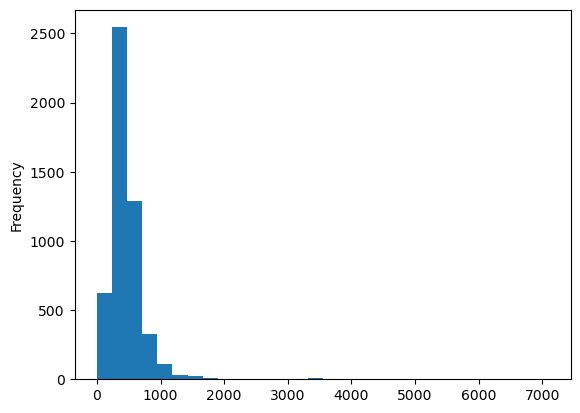

In [44]:
df_seq.length.plot.hist(bins=30)